In [3]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\Saad Ahmed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
text = open("read.txt").read()
lower_case = text.lower()

In [5]:
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

In [6]:
tokenized_words = word_tokenize(cleaned_text, "english")


In [7]:
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)
        

In [8]:
emotion_list = []
with open('emotion.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", "").replace(",", "").replace("'", "").strip()
        word, emotion = clear_line.split(":")
        
        if word in final_words:
            emotion_list.append(emotion)
            


In [9]:
w = Counter(emotion_list)

In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    neg = score['neg']
    pos = score['pos']
    if neg > pos:
        print("Negation Sentiment")
    elif pos > neg:
        print("Positive Sentiment")
    else:
        print("Neutral Vibe")
        
sentiment_analyse(cleaned_text)

Positive Sentiment


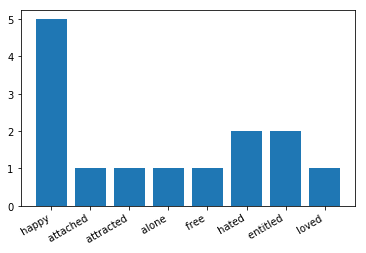

In [12]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()